Exercise 1

In [1]:
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
# download lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/lRY2FvS7P3TMPwI')

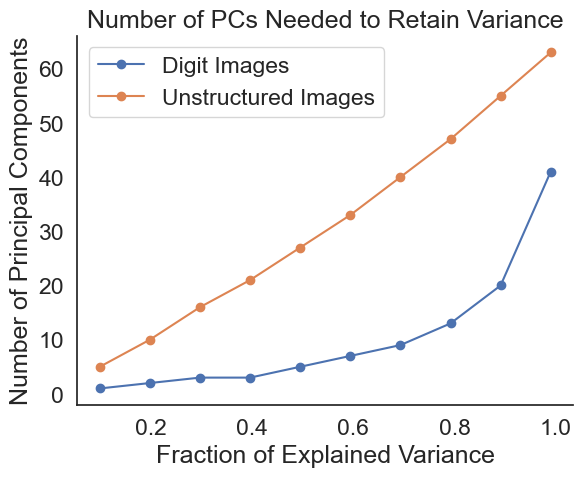

In [4]:
# load image data
dataset = load_digits()
images = dataset.data

def explained_variance_ratio(pca):
    return np.cumsum(pca.explained_variance_ratio_)

def num_pcs_to_retain_variance(explained_variance_ratios, variance_threshold):
    return np.searchsorted(explained_variance_ratios, variance_threshold) + 1

# Function to plot number of PCs needed to retain a certain fraction of EVR
def plot_pcs_needed_for_variance(X, variances, title):
    pca = PCA()
    pca.fit(X)
    explained_variance_ratios = explained_variance_ratio(pca)
    num_pcs = [num_pcs_to_retain_variance(explained_variance_ratios, v) for v in variances]

    plt.plot(variances, num_pcs, marker='o', label=title)
    plt.xlabel('Fraction of Explained Variance')
    plt.ylabel('Number of Principal Components')
    plt.title('Number of PCs Needed to Retain Variance')
    plt.legend()

# Variance thresholds to test
variances = np.linspace(0.1, 0.99, 10)

# Plot for digit images
plot_pcs_needed_for_variance(images, variances, 'Digit Images')

# Generate unstructured images by randomly permuting pixels in each image
X_unstructured = images.copy()
for i in range(X_unstructured.shape[0]):
    np.random.shuffle(X_unstructured[i])

# Plot for unstructured images
plot_pcs_needed_for_variance(X_unstructured, variances, 'Unstructured Images')

# Show plot
plt.show()

For the unstructured images, the number of PC required to retain a certain fraction of variance is higher and increases more rapidly than for the structured images. structured data will typically require fewer principal components to retain a given fraction of variance compared to unstructured data. 